In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [4]:
points = np.load("images/Points.npy")
points

array([[318., 263.],
       [524., 376.],
       [310., 660.],
       [ 87., 479.]])

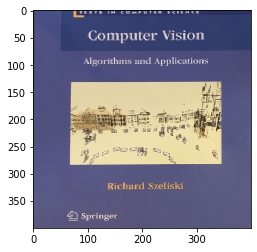

In [14]:
h, w = 400, 400
dest = np.array([[0,0], [w-1,0], [w-1,h-1], [0,h-1]])

M, _ = cv.findHomography(points, dest)

final = cv.warpPerspective(cv.imread("images/book1.jpg"), M, (w,h))

plt.imshow(final[:,:,::-1])

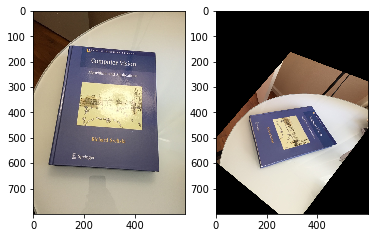

In [45]:
book1 = cv.imread("images/book1.jpg")
book2 = cv.imread("images/book2.jpg")

pts_src = np.array([[141, 131], [480, 159], [493, 630],[64, 601]], dtype=float)
pts_dst = np.array([[318, 256],[534, 372],[316, 670],[73, 473]], dtype=float)

M, _ = cv.findHomography(pts_src, pts_dst)

h = cv.warpPerspective(book1, M, book1.shape[:2][::-1])

fig = plt.figure()
ax = fig.add_subplot(121)
ax.imshow(book2[:,:,::-1])
ax = fig.add_subplot(122)
ax.imshow(h[:,:,::-1])

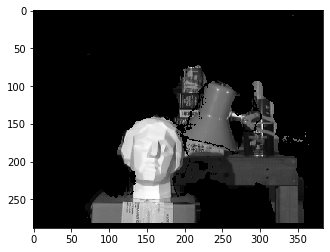

In [52]:
imgl = cv.imread("images/tsukuba_l.png", cv.IMREAD_GRAYSCALE)
imgr = cv.imread("images/tsukuba_r.png", cv.IMREAD_GRAYSCALE)

stereo = cv.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgl, imgr)

ret = imgl.copy()
ret[disparity < 120] = 0

plt.imshow(ret, cmap="gray")

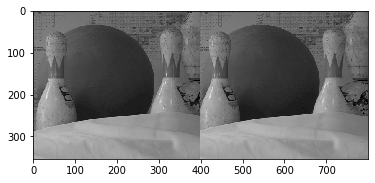

In [98]:
v0 = cv.imread("images/view0.png", cv.IMREAD_GRAYSCALE)
v1 = cv.imread("images/view1.png", cv.IMREAD_GRAYSCALE)

plt.imshow(np.hstack([v0, v1]), cmap="gray")#[:,:,::-1])

In [118]:
def ssd(imgl, imgr, patch, max_offset):
    h, w = imgl.shape[:2]

    disparity = np.zeros(imgl.shape[:2]).astype("uint8")
       
    offset_trim = 255 / max_offset
      
    for i in range(patch, h - patch):   
        for j in range(patch, w - patch):
            best_offset = 0
            min_ssd = float("inf")
            
            for offset in range(max_offset):
                p1 = imgl[i-patch:i+patch, j-patch:j+patch].astype("int")
                _p2 = imgr[i-patch:i+patch, j-patch+offset:j+patch+offset].astype("int")
                p2 = np.zeros(p1.shape)
                p2[:_p2.shape[0], :_p2.shape[1]] = _p2

                ssd = np.sum((p1-p2)**2)

                if ssd < min_ssd:
                    min_ssd = ssd
                    best_offset = offset

            disparity[i, j] = best_offset * offset_trim

    return disparity

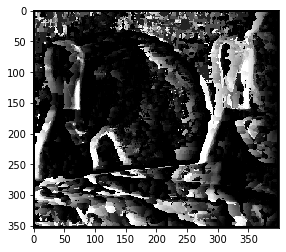

In [119]:
plt.imshow(ssd(v0,v1,3,50), cmap="gray")